In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pkg import detrend_group

In [18]:
df = pd.read_csv("./data/dt_clim_vars.csv").query('country=="United States of America" ')
df = df.loc[:, ~df.columns.str.contains("sm|tmax", regex=True)]

#.query('country=="United States of America" & cropname=="Maize" ')[['year', 'yield', 'csif', "yield_og", "csif_og"]]
df

,cropname,country,iso_a3,year,yield_og,csif_og,yield,csif
2196,Barley,United States of America,USA,2000,3288.1,0.137698,0.014232,0.207655
2197,Barley,United States of America,USA,2001,3126.7,0.109103,-0.046308,-0.026649
2198,Barley,United States of America,USA,2002,2960.9,0.096731,-0.111001,-0.148538
2199,Barley,United States of America,USA,2003,3167.3,0.108360,-0.053824,-0.036553
2200,Barley,United States of America,USA,2004,3742.9,0.112538,0.102949,-0.000260
...,...,...,...,...,...,...,...,...
41099,Wheat,United States of America,USA,2019,3474.6,0.127255,0.078728,0.034835
41100,Wheat,United States of America,USA,2020,3341.7,0.125876,0.030397,0.023656
41101,Wheat,United States of America,USA,2021,2980.5,0.113569,-0.093324,-0.079514
41102,Wheat,United States of America,USA,2022,3126.5,0.112713,-0.054833,-0.087363


In [21]:
detrend_group(df, 'yield_og', log_transform=True)


,cropname,country,iso_a3,year,yield_og,csif_og,yield,csif,yield_og_dt
2196,Barley,United States of America,USA,2000,3288.1,0.137698,0.014232,0.207655,0.014232
2197,Barley,United States of America,USA,2001,3126.7,0.109103,-0.046308,-0.026649,-0.046308
2198,Barley,United States of America,USA,2002,2960.9,0.096731,-0.111001,-0.148538,-0.111001
2199,Barley,United States of America,USA,2003,3167.3,0.108360,-0.053824,-0.036553,-0.053824
2200,Barley,United States of America,USA,2004,3742.9,0.112538,0.102949,-0.000260,0.102949
...,...,...,...,...,...,...,...,...,...
41099,Wheat,United States of America,USA,2019,3474.6,0.127255,0.078728,0.034835,0.078728
41100,Wheat,United States of America,USA,2020,3341.7,0.125876,0.030397,0.023656,0.030397
41101,Wheat,United States of America,USA,2021,2980.5,0.113569,-0.093324,-0.079514,-0.093324
41102,Wheat,United States of America,USA,2022,3126.5,0.112713,-0.054833,-0.087363,-0.054833


In [93]:
ugh = pd.read_pickle("./data/combined_update_dt.pkl")
ugh = ugh.query('country=="United States of America" & cropname=="Maize"  ')[['yield', 'csif']]
ugh

,yield,csif
40161,8.065333,0.000008
40162,-27.295058,0.004525
40163,-700.155449,-0.014009
40164,-11.115841,-0.011190
40165,1010.423768,0.017074
40166,114.363377,-0.000132
40167,69.302986,0.003190
40168,52.542594,0.001190
40169,97.382203,-0.008668
40170,677.021812,0.012013


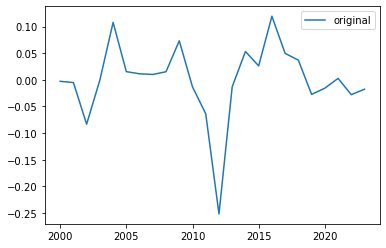

In [83]:
year = test['year'].values
y = test['yield_og'].values


def linear_detrend(year, y):
    X = sm.add_constant(year)  # add intercept
    model = sm.OLS(y, X).fit()
    trend = model.predict(X)
    y_detrended = y - trend
    return y_detrended

y_dt = linear_detrend(year,y)
plt.plot(year, test['yield'], label="original")
#plt.plot(year, y_dt, label="detrended")
plt.legend()
plt.show()
